In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.transforms import Affine2D

Veamos los resultados promediados del tiempo de ejecucion entre los 5 ejemplos generados.

In [56]:
palette = sns.color_palette("viridis")

In [57]:
ejemplos = []
for i in range(1, 6):
    ej = pd.read_csv(f"resultados_parametros_ej{i}.csv")
    ejemplos.append(ej)

    
#Me quedo con las columnas de Parámetro, Valor, Tiempo y Objetivo    
filas_extraidas = [ej.iloc[:, :4] for ej in ejemplos]

#Promedio las columnas 3 y 4
df_prom = filas_extraidas[0][['Parámetro', 'Valor']].copy() 
df_prom['Tiempo (s)'] = sum(ej['Tiempo (s)'] for ej in filas_extraidas) / len(filas_extraidas)  
df_prom['Objetivo'] = sum(ej['Objetivo'] for ej in filas_extraidas) / len(filas_extraidas)  


print(df_prom)


                       Parámetro  Valor   Tiempo (s)      Objetivo
0        mip.strategy.nodeselect    0.0   218.310875  246149.99996
1        mip.strategy.nodeselect    1.0   212.359879  246149.99996
2        mip.strategy.nodeselect    2.0   220.355264  246149.99996
3        mip.strategy.nodeselect    3.0   216.540686  246149.99996
4    mip.strategy.variableselect   -1.0   212.037502  246149.99996
5    mip.strategy.variableselect    0.0   214.373362  246149.99996
6    mip.strategy.variableselect    1.0   263.930900  246149.99996
7    mip.strategy.variableselect    2.0   175.138922  246149.99996
8    mip.strategy.variableselect    3.0   166.015699  246149.99996
9    mip.strategy.variableselect    4.0   217.198892  246149.99996
10        preprocessing.presolve    0.0   376.246160  246149.99996
11        preprocessing.presolve    1.0   221.553343  246149.99996
12  mip.strategy.heuristiceffort    0.0  7792.805994  246149.99996
13  mip.strategy.heuristiceffort    0.5   208.776560  246149.9

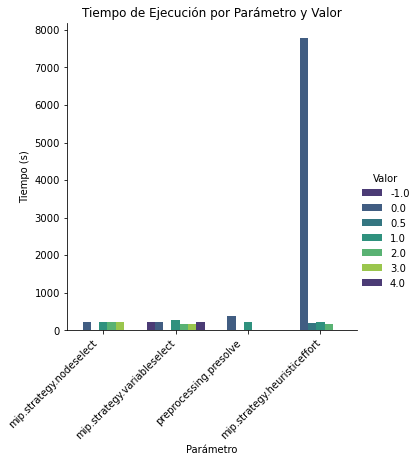

In [58]:
grafico_barras("Tiempo de Ejecución por Parámetro y Valor", df_prom)

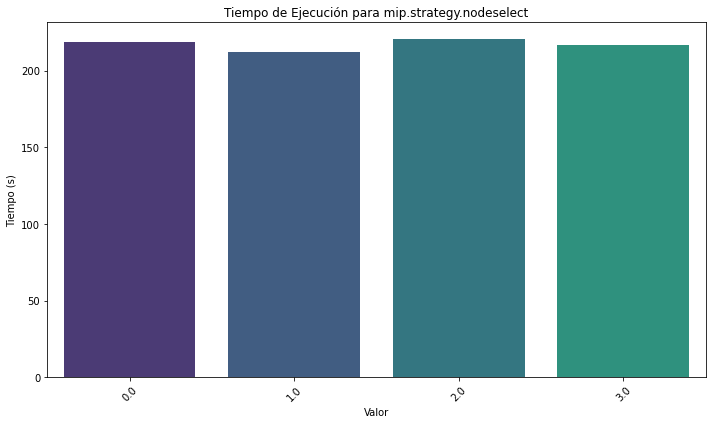

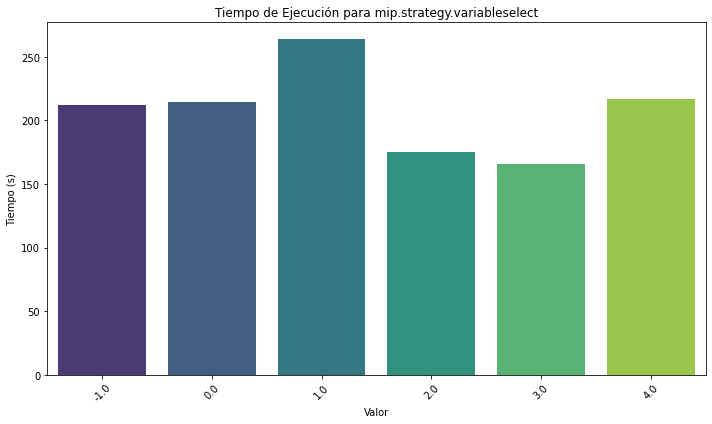

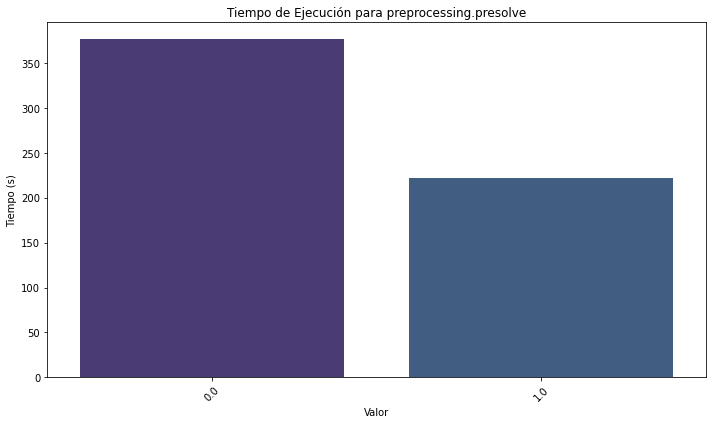

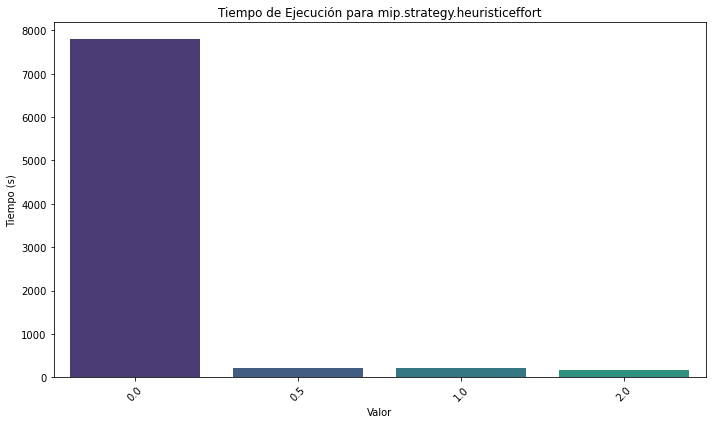

In [59]:
df_prom.columns = df_prom.columns.str.strip()
df_prom['Tiempo (s)'] = pd.to_numeric(df_prom['Tiempo (s)'], errors='coerce')


#Creo gráficos de barras para cada categoría de 'Parámetro'
parametros = df_prom['Parámetro'].unique()

for parametro in parametros:
    df_param = df_prom[df_prom['Parámetro'] == parametro]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_param, x='Valor', y='Tiempo (s)', palette = palette)
    plt.title(f'Tiempo de Ejecución para {parametro}')
    plt.xlabel('Valor')
    plt.ylabel('Tiempo (s)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
